In [1]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
x_train, y_train=make_blobs(n_samples=800, n_features=2, centers=[[1,1],[-1,1],[-1,-1],[1,-1]], shuffle=True, cluster_std=0.3)
x_test, y_test=make_blobs(n_samples=200, n_features=2, centers=[[1,1],[-1,1],[-1,-1],[1,-1]], shuffle=True, cluster_std=0.3)

In [3]:
x_train

array([[-1.47190604, -0.61588587],
       [-0.74973281, -1.19103408],
       [ 0.73039345, -1.14476078],
       ...,
       [-1.23904555,  1.02763692],
       [ 1.16302692, -0.91930826],
       [ 1.23472137, -0.76218537]])

In [4]:
y_train

array([2, 2, 3, 0, 2, 1, 3, 1, 3, 0, 0, 2, 0, 2, 2, 3, 0, 0, 0, 2, 1, 3,
       0, 3, 2, 1, 3, 1, 2, 3, 1, 0, 1, 3, 1, 3, 2, 2, 2, 3, 3, 1, 2, 2,
       2, 1, 0, 3, 0, 2, 2, 3, 1, 3, 1, 3, 2, 1, 1, 2, 2, 3, 2, 1, 2, 1,
       1, 2, 0, 0, 3, 3, 2, 1, 3, 2, 3, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 3,
       0, 0, 0, 1, 2, 1, 0, 3, 2, 1, 0, 0, 0, 2, 3, 1, 1, 2, 0, 1, 3, 3,
       3, 3, 0, 1, 3, 0, 1, 3, 3, 2, 1, 0, 0, 3, 3, 0, 2, 3, 1, 3, 3, 1,
       0, 1, 0, 2, 0, 3, 0, 3, 1, 2, 2, 0, 3, 3, 1, 2, 1, 1, 0, 3, 3, 1,
       1, 0, 2, 2, 2, 3, 0, 3, 3, 1, 2, 3, 3, 0, 2, 0, 0, 0, 3, 3, 3, 3,
       0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 2, 1, 3, 1, 2, 2, 3, 0, 1, 1, 3, 3,
       3, 1, 0, 1, 3, 0, 0, 2, 1, 2, 0, 1, 3, 0, 1, 0, 2, 3, 0, 2, 0, 2,
       0, 3, 1, 2, 2, 0, 3, 0, 0, 2, 3, 0, 1, 1, 1, 1, 0, 1, 3, 3, 2, 3,
       1, 1, 2, 2, 0, 1, 3, 1, 0, 1, 3, 3, 0, 0, 3, 2, 3, 2, 1, 2, 1, 2,
       3, 3, 2, 3, 1, 2, 2, 1, 3, 2, 0, 0, 3, 3, 1, 0, 0, 1, 2, 3, 1, 0,
       2, 1, 1, 3, 0, 0, 0, 2, 2, 3, 1, 3, 0, 1, 0,

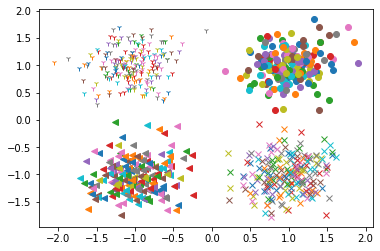

In [5]:
def visualize_dots(x, y = None, c='r'):
    if y is None:
        y=[None]*len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            if y_==0:
                plt.plot(x_[0], x_[1], 'o')
            elif (y_==1):
                plt.plot(x_[0], x_[1], '1')
            elif (y_==2):
                plt.plot(x_[0], x_[1], '<')
            else:
                plt.plot(x_[0], x_[1], 'x')
plt.figure()
visualize_dots(x_train, y_train, c='r')
plt.show()

In [6]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)
x_test=torch.FloatTensor(x_test)
y_test=torch.FloatTensor(y_test)

In [12]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.linear_1=torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu=torch.nn.ReLU()
        self.linear_2=torch.nn.Linear(self.hidden_size,4)
        self.softmax=torch.nn.Softmax()
    
    def forward(self, input_tensor):
        linear1=self.linear_1(input_tensor)
        relu=self.relu(linear1)
        linear2=self.linear_2(relu)
        output=self.softmax(linear2)
        return output

In [13]:
model=NeuralNet(2,5)
lr=0.03
loss=torch.nn.MultiLabelSoftMarginLoss()
epochs=2000
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

In [14]:
model.eval()
test_loss_bef_train=loss(model(x_test).squeeze(), y_test)
print("test loss before training: ", test_loss_bef_train.item())

C:\conda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


RuntimeError: The size of tensor a (200) must match the size of tensor b (4) at non-singleton dimension 1

In [10]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output=model(x_train)
    train_loss=loss(train_output.squeeze(), y_train)
    if epoch%100==0:
        print("Train loss at {} epoch is {}".format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 epoch is 0.9937984347343445
Train loss at 100 epoch is -19.445255279541016
Train loss at 200 epoch is -20.161649703979492
Train loss at 300 epoch is -20.260271072387695
Train loss at 400 epoch is -20.395946502685547
Train loss at 500 epoch is -20.457616806030273
Train loss at 600 epoch is -20.468589782714844
Train loss at 700 epoch is -20.507070541381836
Train loss at 800 epoch is -20.514223098754883
Train loss at 900 epoch is -20.52111053466797
Train loss at 1000 epoch is -20.52831268310547
Train loss at 1100 epoch is -20.532089233398438
Train loss at 1200 epoch is -20.536306381225586
Train loss at 1300 epoch is -20.569517135620117
Train loss at 1400 epoch is -20.578168869018555
Train loss at 1500 epoch is -20.580482482910156
Train loss at 1600 epoch is -20.582107543945312
Train loss at 1700 epoch is -20.583280563354492
Train loss at 1800 epoch is -20.584190368652344
Train loss at 1900 epoch is -20.615558624267578


In [11]:
model.eval()
test_loss_aft_train=loss(model(x_test).squeeze(), y_test)
print("test loss After training: ", test_loss_aft_train.item())

test loss After training:  -20.56562042236328
